In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
sns.set() # Activar módulo de seaborn

In [2]:
#Cargue de datos
df = pd.read_excel(r"D:\Users\MARIAFLOREZ\Documents\10mo Semestre\T2\Encuesta_grupos_cod.xlsx")
df.columns

Index(['Universidad', 'Almacenamiento de datos',
       'Estímulo habilidades digitales',
       'Aprovechamiento recursos tecnológicos',
       'Orientación transformación digital', 'Inversión en tecnologías',
       'Monitoreo transformación digital',
       'Herramienta para captura de datos en tiempo real',
       'Aprovechamiento de datos para validar resultados investigativos',
       'Ciberseguridad', 'Responsables de la TD',
       'Proyectos para orientar la TD',
       'Identificación de tecnologías para apropiación',
       'Computación en la nube', 'Analítica de datos', 'Big Data',
       'Robótica y automatización', 'Internet de las cosas',
       'Manufactura aditiva/Impresión 3D', 'Machine Learning o Aprendizaje',
       'Ciberseguridad.', 'Nanotecnología', 'Biotecnología',
       'Realidad virtual', 'Realidad aumentada', 'Blockchain',
       'Business Intelligence', 'Materiales avanzados',
       'Inteligencia Artificial',
       'Actividades planeadas de gestión tecnol

## Estadísticas descriptivas

In [3]:
import statistics
from statistics import multimode
#data = df.describe()
#data.loc["mediana"] = round(df.median(), 2)
#data.loc["moda"] = df.mode().mean()
#data.to_csv("Descriptivos_grupos.csv", decimal = ',') # se le puede decir que el decimal sea una , y no punto


## Gráficas

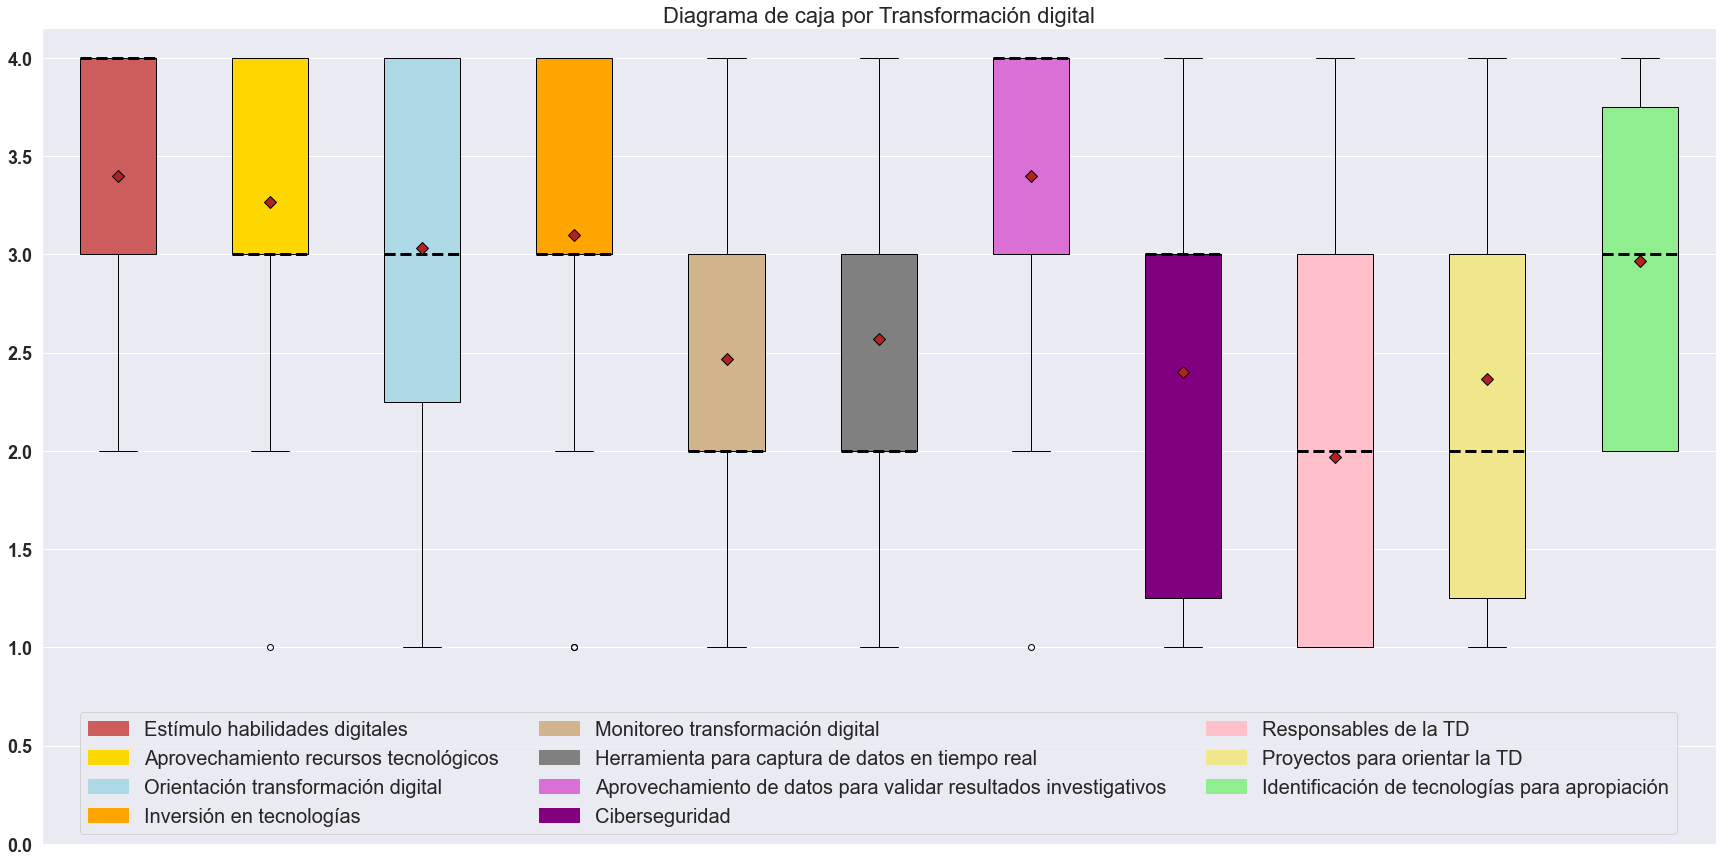

In [17]:
#Gráfico de caja y bigotes Transformación digital
import matplotlib.patches as mpatches

#datos
yt40 = (df["Estímulo habilidades digitales"], df["Aprovechamiento recursos tecnológicos"], df["Orientación transformación digital"], df["Inversión en tecnologías"], df["Monitoreo transformación digital"], df["Herramienta para captura de datos en tiempo real"], df["Aprovechamiento de datos para validar resultados investigativos"], df["Ciberseguridad"], df["Responsables de la TD"], df["Proyectos para orientar la TD"], df["Identificación de tecnologías para apropiación"])
datat40 = pd.DataFrame(yt40).transpose()

fig_t40, ax_t40 = plt.subplots(figsize = (30, 15))
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick', markersize = 9)
box = ax_t40.boxplot(x = datat40, patch_artist=True, meanprops=meanpointprops, meanline=False, showmeans=True, medianprops = dict(linestyle='--', linewidth=3, color='black')) 

#asignar color a cada box
colors = ['indianred', 'gold', 'lightblue', 'orange', 'tan', 'grey', 'orchid', 'purple', 'pink','khaki', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

#ejes y título
plt.xticks(rotation = 90, fontsize = 18, weight = 'bold')
ax_t40.get_xaxis().set_visible(False)
plt.yticks(fontsize = 18, weight = "bold")
ax_t40.set_yticks((0,4), minor = True)
plt.title("Diagrama de caja por Transformación digital", fontsize = 22)


#set colors legend
ehd = mpatches.Patch(color='indianred', label='Estímulo habilidades digitales')
art = mpatches.Patch(color='gold', label='Aprovechamiento recursos tecnológicos')
otd = mpatches.Patch(color='lightblue', label='Orientación transformación digital')
it = mpatches.Patch(color='orange', label='Inversión en tecnologías')
mtd  = mpatches.Patch(color='tan', label='Monitoreo transformación digital')
dtr = mpatches.Patch(color='grey', label='Herramienta para captura de datos en tiempo real')
ari = mpatches.Patch(color='orchid', label='Aprovechamiento de datos para validar resultados investigativos')
c = mpatches.Patch(color='purple', label='Ciberseguridad')
rtd = mpatches.Patch(color='pink', label='Responsables de la TD')
ptd = mpatches.Patch(color='khaki', label='Proyectos para orientar la TD')
ita = mpatches.Patch(color='lightgreen', label='Identificación de tecnologías para apropiación')



ax_t40.legend(handles=[ehd, art, otd, it, mtd, dtr, ari, c, rtd, ptd, ita], ncol = 3, fontsize = 20, loc = "lower center")

#plt.savefig('Transformación digital grupos.png')

plt.show()



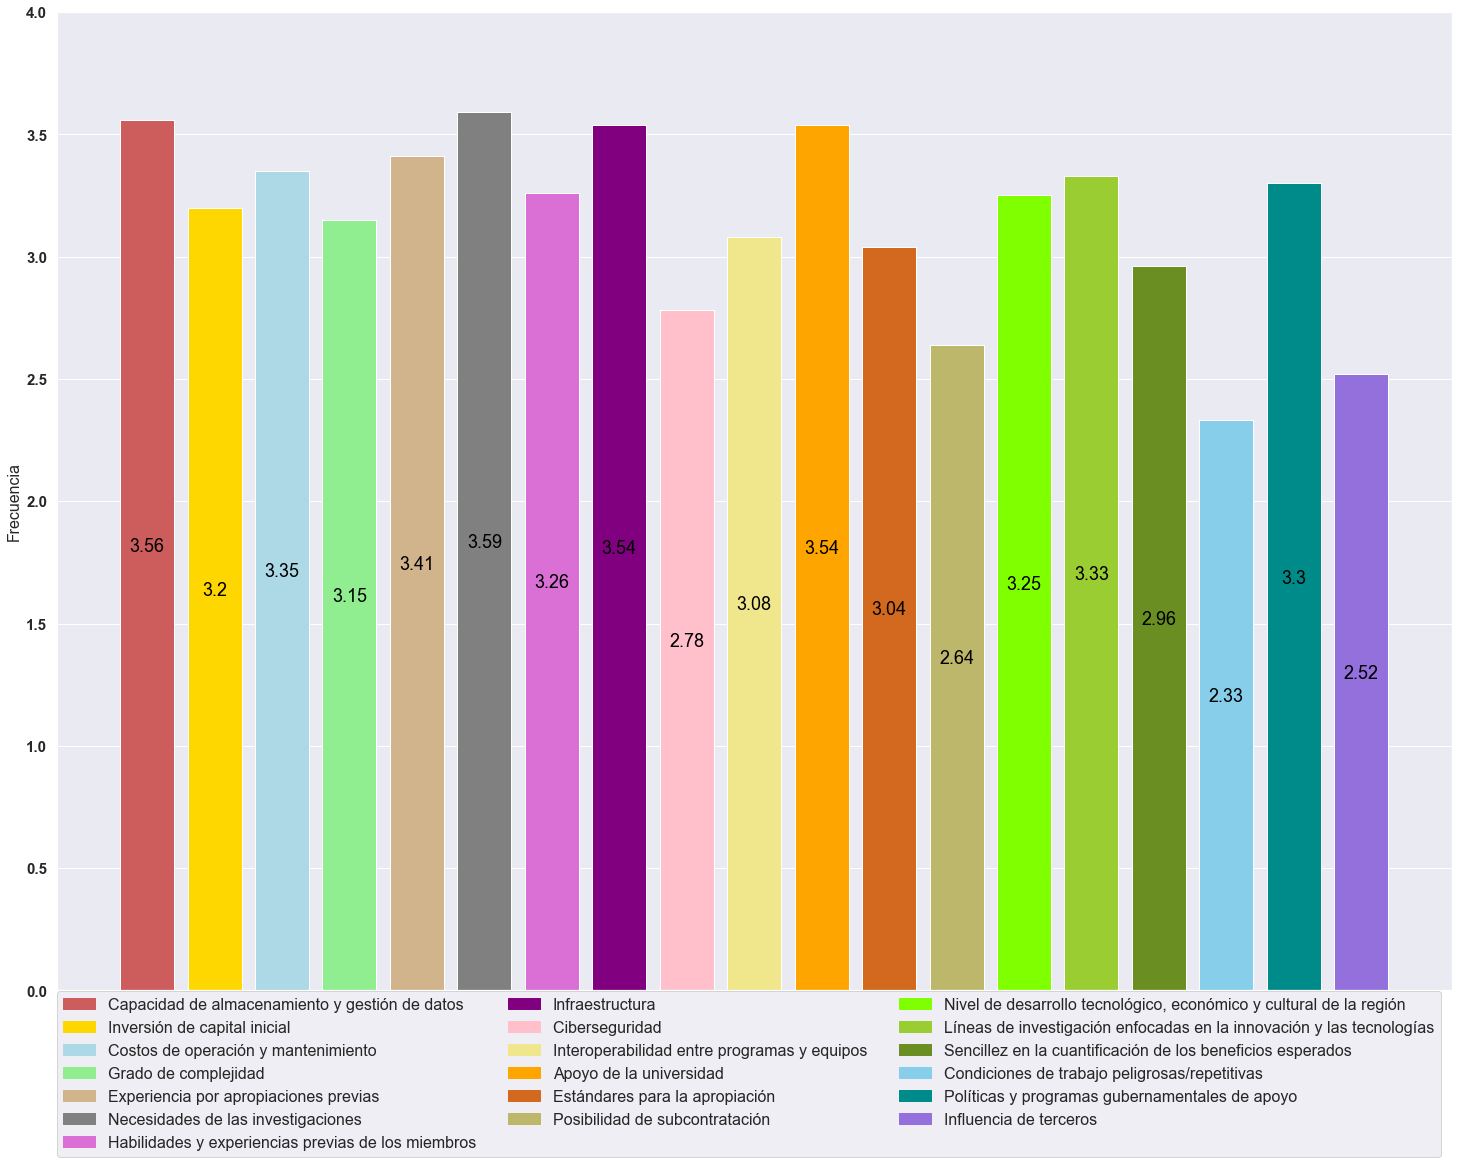

In [5]:
#Gráfica de barras factores de apropiación


data_y =[round(df['Capacidad de almacenamiento y gestión de datos'].mean(),2), round(df['Inversión de capital inicial'].mean(),2),
        round(df['Costos de operación y mantenimiento'].mean(),2), round(df['Grado de complejidad'].mean(),2),
         round(df['Experiencia por apropiaciones previas'].mean(),2),round(df['Necesidades de las investigaciones'].mean(),2),
         round(df['Habilidades y experiencias previas de los miembros'].mean(),2),round(df['Infraestructura'].mean(),2),
         round(df['Ciberseguridad '].mean(),2),round(df['Interoperabilidad entre programas y equipos'].mean(),2),
         round(df['Apoyo de la universidad'].mean(),2),round(df['Estándares para la apropiación'].mean(),2),
         round(df['Posibilidad de subcontratación'].mean(),2),
         round(df['Nivel de desarrollo tecnológico, económico y cultural de la región'].mean(),2),
         round(df['Líneas de investigación enfocadas en la innovación y las tecnologías'].mean(),2),
         round(df['Sencillez en la cuantificación de los beneficios esperados'].mean(),2),
         round(df['Condiciones de trabajo peligrosas/repetitivas'].mean(),2),
         round(df['Políticas y programas gubernamentales de apoyo'].mean(),2),round(df['Influencia de terceros'].mean(),2)]

data_x = np.array(('Capacidad de almacenamiento y gestión de datos', 'Inversión de capital inicial', 'Costos de operación y mantenimiento',
                  'Grado de complejidad', 'Experiencia por apropiaciones previas', 'Necesidades de las investigaciones',
                  'Habilidades y experiencias previas de los miembros', 'Infraestructura', 'Ciberseguridad ',
                  'Interoperabilidad entre programas y equipos', 'Apoyo de la universidad','Estándares para la apropiación',
                  'Posibilidad de subcontratación', 'Nivel de desarrollo tecnológico, económico y cultural de la región',
                  'Líneas de investigación enfocadas en la innovación y las tecnologías', 'Sencillez en la cuantificación de los beneficios esperados',
                  'Condiciones de trabajo peligrosas/repetitivas', 'Políticas y programas gubernamentales de apoyo',
                  'Influencia de terceros'))

fig = plt.figure(u'Gráfica de barras', figsize=(25, 18)) # Figure
ax = fig.add_subplot(111) # Axes

xx = range(len(data_y))

barra = ax.bar(xx, data_y, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(data_x)

#asignar color a cada barra
colors = ['indianred', 'gold', 'lightblue', 'lightgreen', 'tan', 'grey', 'orchid', 'purple', 'pink','khaki', 'orange', 'chocolate', 'darkkhaki', 'chartreuse', 'yellowgreen', 'olivedrab', 'skyblue', 'darkcyan', 'mediumpurple']
for patch, color in zip(barra, colors):
    patch.set_facecolor(color)


#plt.title("Factores de apropiación de tecnologías 4.0", fontsize = 20)
plt.xlabel("Factores")
plt.ylabel("Frecuencia", fontsize = 16)
plt.yticks(fontsize = 15, weight = "bold")
ax.set_yticks((0.5,4), minor = True)
ax.get_xaxis().set_visible(False)
#Etiquetas
i=0
for path in ax.patches:
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2,  
            s=data_y[i],
            horizontalalignment='center', 
            verticalalignment='bottom', fontsize=18, color = "black"
            )
    i+=1
    
#set colors legend
cad = mpatches.Patch(color='indianred', label='Capacidad de almacenamiento y gestión de datos')
ici = mpatches.Patch(color='gold', label='Inversión de capital inicial')
com = mpatches.Patch(color='lightblue', label='Costos de operación y mantenimiento')
gc = mpatches.Patch(color='lightgreen', label='Grado de complejidad')
eap  = mpatches.Patch(color='tan', label='Experiencia por apropiaciones previas')
ni = mpatches.Patch(color='grey', label='Necesidades de las investigaciones')
hem = mpatches.Patch(color='orchid', label='Habilidades y experiencias previas de los miembros')
inf = mpatches.Patch(color='purple', label='Infraestructura')
cib = mpatches.Patch(color='pink', label='Ciberseguridad ')
ipe = mpatches.Patch(color='khaki', label='Interoperabilidad entre programas y equipos')
au = mpatches.Patch(color='orange', label='Apoyo de la universidad')
ea = mpatches.Patch(color='chocolate', label='Estándares para la apropiación')
ps = mpatches.Patch(color='darkkhaki', label='Posibilidad de subcontratación')
ndtec = mpatches.Patch(color='chartreuse', label='Nivel de desarrollo tecnológico, económico y cultural de la región')
liit = mpatches.Patch(color='yellowgreen', label='Líneas de investigación enfocadas en la innovación y las tecnologías')
scb = mpatches.Patch(color='olivedrab', label='Sencillez en la cuantificación de los beneficios esperados')
ctp = mpatches.Patch(color='skyblue', label='Condiciones de trabajo peligrosas/repetitivas')
ppg = mpatches.Patch(color='darkcyan', label='Políticas y programas gubernamentales de apoyo')
iterc = mpatches.Patch(color='mediumpurple', label='Influencia de terceros')

ax.legend(handles=[cad, ici, com, gc, eap, ni, hem, inf, cib, ipe, au, ea, ps, ndtec, liit, scb, ctp, ppg, iterc], ncol = 3, fontsize = 16, loc = (0,-0.17))
plt.savefig('Factor para la apropiación de T4.0 grupos de investigación.png')
    
plt.show()



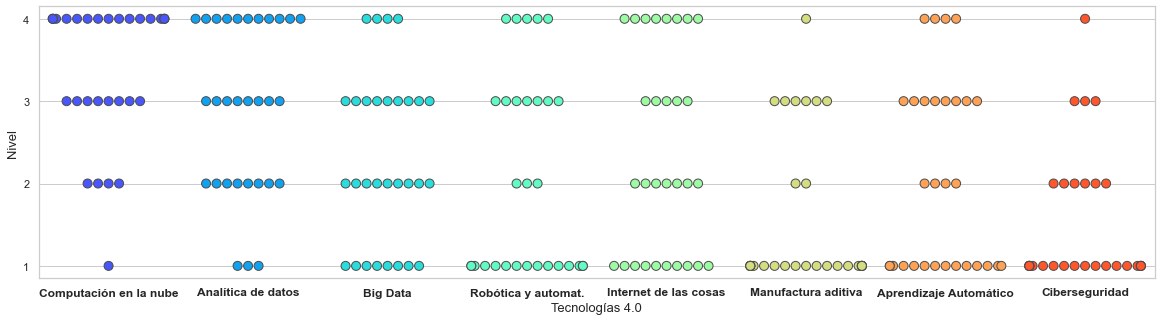

In [112]:
#Gráfica swarmplots tecnolgías 4.0
fig, ax_t40 = plt.subplots(figsize = (20 , 5)) 
x_t40 = np.array(("Computación en la nube", "Analítica de datos", "Big Data", "Robótica y automat.", "Internet de las cosas", 
               "Manufactura aditiva", "Aprendizaje Automático", "Ciberseguridad"))

y_t40 = [df["Computación en la nube"], df["Analítica de datos"], df["Big Data"], df["Robótica y automatización"],
        df["Internet de las cosas"], df["Manufactura aditiva/Impresión 3D"], df["Machine Learning o Aprendizaje"],
        df["Ciberseguridad."]]


sns.set(style = 'whitegrid')

sns.swarmplot(data= y_t40,
                   linewidth=1, size = 9, palette = 'rainbow')

ax_t40.set_xlabel( "Tecnologías 4.0" , size = 13)
ax_t40.set_xticklabels(x_t40, fontsize = 12, fontweight = "bold")
ax_t40.set_ylabel( "Nivel" , size = 13 )  
ax_t40.set_yticks(range(1,5,1), minor = False)
#ax_t40.set_title( "Tecnologías 4.0" , size = 16 ) 

plt.savefig("Gráfico de enjambre T4.0_1 Grupos.png")

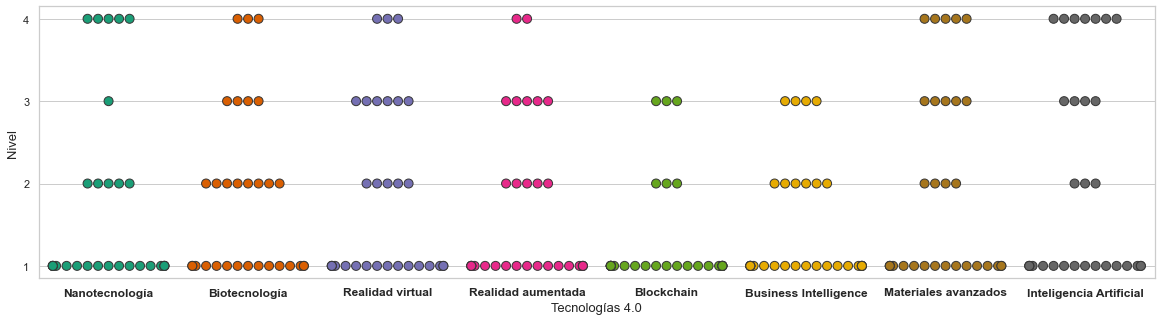

In [131]:
#Gráfica strip plots tecnolgías 4.0
fig_2, ax_t40_2 = plt.subplots(figsize = (20 , 5)) 
x_t40_2 = np.array(("Nanotecnología", "Biotecnología", "Realidad virtual", "Realidad aumentada", "Blockchain","Business Intelligence", 
               "Materiales avanzados", "Inteligencia Artificial"))

y_t40_2 = [df["Nanotecnología"], df["Biotecnología"], df["Realidad virtual"], df["Realidad aumentada"],
        df["Blockchain"], df["Business Intelligence"], df["Materiales avanzados"], df["Inteligencia Artificial"]]


sns.set(style = 'whitegrid')

sns.swarmplot(data= y_t40_2, linewidth=1, size = 9, palette = 'Dark2')

ax_t40_2.set_xlabel( "Tecnologías 4.0" , size = 13)
ax_t40_2.set_xticklabels(x_t40_2, fontsize = 12, fontweight = "bold")
ax_t40_2.set_ylabel( "Nivel" , size = 13 )   
ax_t40_2.set_yticks(range(1,5,1), minor = False)
#ax_t40_2.set_title( "Tecnologías 4.0" , size = 16 ) 

plt.savefig("Gráfico de enjambre T4.0_2 Grupos.png")